# TECH CHALLENGE – FASE 3: Tratamento dos dados

Este notebook realiza o tratamento da base de crédito para preparar os dados para modelagem.  
- **Objetivo**: transformar variáveis categóricas em numéricas, tratar possíveis dados sensíveis e padronizar o conjunto para uso em modelos de ML.  
- **Target (variável resposta)**: `default` (1 = inadimplente, 0 = adimplente).  
- **Base**: `data/credit.csv` (versão traduzida da German Credit).

# IMPORTAR BASE DE DADOS

In [54]:
import pandas as pd
pd.set_option("display.max_colwidth", None)  # mostra todo o conteúdo das células
pd.set_option("display.max_columns", None)   # mostra todas as colunas
pd.set_option("display.width", 1000)         # aumenta a largura do print


In [55]:
data = pd.read_csv('data/credit.csv')
data.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,< 0 DM,6,critical account/ other credits existing (not at this bank),domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not at this bank),(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,4,if not A121 : building society savings agreement/ life insurance,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [56]:
print(f"SHAPE: {data.shape}")
print(data.info())

SHAPE: (1000, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   default                      1000 non-null   int64 
 1   conta_corrente               1000 non-null   object
 2   prazo_emprestimo_meses       1000 non-null   int64 
 3   historico_credito            1000 non-null   object
 4   proposito_emprestimo         1000 non-null   object
 5   valor_emprestimo             1000 non-null   int64 
 6   reserva_cc                   1000 non-null   object
 7   tempo_emprego_atual          1000 non-null   object
 8   taxa_comp_salario            1000 non-null   int64 
 9   sexo_est_civil               1000 non-null   object
 10  outros_fiadores              1000 non-null   object
 11  anos_residencia_atual        1000 non-null   int64 
 12  propriedade                  1000 non-null   object
 13  idade           

# TRATAMENTO DE DADOS

## LGPD: dado sensível e engenharia de atributo

No Brasil, informações sobre **gênero/orientação** podem ser consideradas **dados sensíveis**.  
Por isso, removemos a coluna `sexo_est_civil` e, antes disso, extraímos apenas um atributo derivado não sensível:

- **O que fazemos**:
  - Criamos a coluna binária `est_civil`: 1 se o texto indica “single” (solteiro), 0 caso contrário.
  - Removemos `sexo_est_civil` após a derivação para mitigar risco de sensibilidade e viés.

- **Motivação**:
  - Reduzir risco de uso de atributos sensíveis no modelo.
  - Manter uma informação útil (estado civil “solteiro” vs. não) em formato numérico simples e reprodutível.

In [57]:
data['sexo_est_civil'].unique()

array(['male : single', 'female : divorced/separated/married',
       'male : divorced/separated', 'male : married/widowed'],
      dtype=object)

In [58]:
# AQUI VAMOS SEPARAR OS DADOS DE ESTADO CIVIL E SEXO E REMOVER A COLUNA ORIGINAL
est_civil = []
for current_info in data['sexo_est_civil']:
    est_civil.append(current_info[current_info.index(':')+1:].strip() == 'single')
est_civil
data['est_civil'] = [1 if x else 0 for x in est_civil]
data = data.drop(columns=['sexo_est_civil'])
data.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,est_civil
0,0,< 0 DM,6,critical account/ other credits existing (not at this bank),domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,1
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes,0
2,0,no checking account,12,critical account/ other credits existing (not at this bank),(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes,1
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,guarantor,4,if not A121 : building society savings agreement/ life insurance,45,none,for free,1,skilled employee / official,2,none,yes,1
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes,1


# Conversão de variáveis categóricas em numéricas

Transformamos categorias em números para permitir o uso em algoritmos de ML.  
- Para colunas discretas com poucos níveis, usamos mapeamentos diretos (ex.: risco alto/baixo → 0/1).  
- Para colunas textuais com muitos rótulos, mapeamos cada rótulo para um código inteiro, mantendo a informação de categoria (sem impor ordem onde não existe).

## CONTA CORRENTE

In [59]:
data['conta_corrente'].unique()

array(['< 0 DM', '0 <= ... < 200 DM', 'no checking account',
       '>= 200 DM / salary assignments for at least 1 year'], dtype=object)

## Conta corrente

Agrupamos as categorias em uma variável binária:
- **0**: sem conta corrente ou saldo negativo (`no checking account`, `< 0 DM`) → indicação de maior risco.
- **1**: demais casos (saldo ≥ 0) → menor risco relativo.

Isso simplifica o atributo e melhora a interpretabilidade, mantendo o sinal de risco.

In [60]:
conta_corrente_map = {
    'no checking account': 0,
    '< 0 DM': 0
}

data['conta_corrente'] = data['conta_corrente'].map(lambda x: conta_corrente_map.get(x, 1))
data.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,est_civil
0,0,0,6,critical account/ other credits existing (not at this bank),domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,1
1,1,1,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes,0
2,0,0,12,critical account/ other credits existing (not at this bank),(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes,1
3,0,0,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,guarantor,4,if not A121 : building society savings agreement/ life insurance,45,none,for free,1,skilled employee / official,2,none,yes,1
4,1,0,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes,1


# historico_credito

In [61]:
data['historico_credito'].unique()

array(['critical account/ other credits existing (not at this bank)',
       'existing credits paid back duly till now',
       'delay in paying off in the past',
       'no credits taken/ all credits paid back duly',
       'all credits at this bank paid back duly'], dtype=object)

## Histórico de crédito

Mapeamos o texto em um indicador de risco:
- **0 = alto risco**: `critical account/ other credits existing (not at this bank)`, `delay in paying off in the past`
- **1 = baixo risco**: `existing credits paid back duly till now`, `no credits taken/ all credits paid back duly`, `all credits at this bank paid back duly`

Esse mapeamento codifica a qualidade do histórico, preservando a semântica original.

In [62]:
credit_history_map = {
    'critical account/ other credits existing (not at this bank)': 0,
    'delay in paying off in the past': 0,
    'existing credits paid back duly till now': 1,
    'no credits taken/ all credits paid back duly': 1,
    'all credits at this bank paid back duly': 1
}

data['historico_credito'] = data['historico_credito'].map(credit_history_map)
data.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,est_civil
0,0,0,6,0,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,1
1,1,1,48,1,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes,0
2,0,0,12,0,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes,1
3,0,0,42,1,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,guarantor,4,if not A121 : building society savings agreement/ life insurance,45,none,for free,1,skilled employee / official,2,none,yes,1
4,1,0,24,0,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes,1


## Propósito do empréstimo

Esta coluna possui múltiplas categorias (ex.: `car (new)`, `education`, `business`, ...).  
Aqui, convertimos cada rótulo em um código numérico inteiro.  
- Observação: esse código não implica ordem entre categorias; é apenas um identificador para o algoritmo.  
- Em etapas futuras, poderíamos usar One-Hot Encoding caso o modelo se beneficie de representação não ordinal.

In [63]:
data['proposito_emprestimo'].unique()

array(['domestic appliances', '(vacation - does not exist?)',
       'radio/television', 'car (new)', 'car (used)', 'business',
       'repairs', 'education', 'furniture/equipment', 'retraining'],
      dtype=object)

In [64]:
purpose_map = {
    'domestic appliances': 0,
    '(vacation - does not exist?)': 0,
    'radio/television': 0,
    'car (new)': 1,
    'car (used)': 1,
    'business': 1,
    'repairs': 0,
    'education': 1,
    'furniture/equipment': 1,
    'retraining': 1
}

data['proposito_emprestimo'] = data['proposito_emprestimo'].map(purpose_map)
data.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,est_civil
0,0,0,6,0,0,1169,unknown/ no savings account,.. >= 7 years,4,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,1
1,1,1,48,1,0,5951,... < 100 DM,1 <= ... < 4 years,2,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes,0
2,0,0,12,0,0,2096,... < 100 DM,4 <= ... < 7 years,2,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes,1
3,0,0,42,1,0,7882,... < 100 DM,4 <= ... < 7 years,2,guarantor,4,if not A121 : building society savings agreement/ life insurance,45,none,for free,1,skilled employee / official,2,none,yes,1
4,1,0,24,0,1,4870,... < 100 DM,1 <= ... < 4 years,3,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes,1


### Nota sobre codificação

- Convertendo rótulos textuais em inteiros para permitir o treino do modelo.  
- O objetivo é manter a informação categórica em formato numérico simples.  
- Em alternativas de pipeline, poderíamos usar One-Hot para evitar ordinalidade artificial.

In [65]:
data['reserva_cc'].unique()

array(['unknown/ no savings account', '... < 100 DM',
       '500 <= ... < 1000 DM ', '.. >= 1000 DM ', '100 <= ... < 500 DM'],
      dtype=object)

In [66]:
savings_map = {
    'unknown/ no savings account': 0,
    '... < 100 DM': 0,
    '100 <= ... < 500 DM': 0,
    '500 <= ... < 1000 DM ': 1,
    '.. >= 1000 DM ': 1
}

data['reserva_cc'] = data['reserva_cc'].map(savings_map)
data.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,est_civil
0,0,0,6,0,0,1169,0,.. >= 7 years,4,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,1
1,1,1,48,1,0,5951,0,1 <= ... < 4 years,2,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes,0
2,0,0,12,0,0,2096,0,4 <= ... < 7 years,2,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes,1
3,0,0,42,1,0,7882,0,4 <= ... < 7 years,2,guarantor,4,if not A121 : building society savings agreement/ life insurance,45,none,for free,1,skilled employee / official,2,none,yes,1
4,1,0,24,0,1,4870,0,1 <= ... < 4 years,3,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes,1


## tempo_emprego_atual

In [67]:
data['tempo_emprego_atual'].unique()

array(['.. >= 7 years', '1 <= ... < 4 years', '4 <= ... < 7 years',
       'unemployed', '... < 1 year '], dtype=object)

In [68]:
employment_map = {
    'unemployed': 0,
    '... < 1 year ': 0,
    '1 <= ... < 4 years': 1,
    '4 <= ... < 7 years': 1,
    '.. >= 7 years': 1
}

data['tempo_emprego_atual'] = data['tempo_emprego_atual'].map(employment_map)
data.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,est_civil
0,0,0,6,0,0,1169,0,1,4,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,1
1,1,1,48,1,0,5951,0,1,2,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes,0
2,0,0,12,0,0,2096,0,1,2,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes,1
3,0,0,42,1,0,7882,0,1,2,guarantor,4,if not A121 : building society savings agreement/ life insurance,45,none,for free,1,skilled employee / official,2,none,yes,1
4,1,0,24,0,1,4870,0,1,3,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes,1


## outros_fiadores

In [69]:
data['outros_fiadores'].unique()

array(['none', 'guarantor', 'co-applicant'], dtype=object)

In [70]:
data['outros_fiadores'] = data['outros_fiadores'].map(lambda x: 0 if x == 'none' else 1)
data.head()


,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,est_civil
0,0,0,6,0,0,1169,0,1,4,0,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,1
1,1,1,48,1,0,5951,0,1,2,0,2,real estate,22,none,own,1,skilled employee / official,1,none,yes,0
2,0,0,12,0,0,2096,0,1,2,0,3,real estate,49,none,own,1,unskilled - resident,2,none,yes,1
3,0,0,42,1,0,7882,0,1,2,1,4,if not A121 : building society savings agreement/ life insurance,45,none,for free,1,skilled employee / official,2,none,yes,1
4,1,0,24,0,1,4870,0,1,3,0,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes,1


## propriedade

In [71]:
data['propriedade'].unique()

array(['real estate',
       'if not A121 : building society savings agreement/ life insurance',
       'unknown / no property',
       'if not A121/A122 : car or other, not in attribute 6'],
      dtype=object)

In [72]:
property_map = {
    'unknown / no property': 0,
    'if not A121 : building society savings agreement/ life insurance': 1,
    'if not A121/A122 : car or other, not in attribute 6': 1,
    'real estate': 2
}

data['propriedade'] = data['propriedade'].map(property_map)
data.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,est_civil
0,0,0,6,0,0,1169,0,1,4,0,4,2,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,1
1,1,1,48,1,0,5951,0,1,2,0,2,2,22,none,own,1,skilled employee / official,1,none,yes,0
2,0,0,12,0,0,2096,0,1,2,0,3,2,49,none,own,1,unskilled - resident,2,none,yes,1
3,0,0,42,1,0,7882,0,1,2,1,4,1,45,none,for free,1,skilled employee / official,2,none,yes,1
4,1,0,24,0,1,4870,0,1,3,0,4,0,53,none,for free,2,skilled employee / official,2,none,yes,1


## outros_planos_financiamento

In [73]:
data['outros_planos_financiamento'].unique()

array(['none', 'bank', 'stores'], dtype=object)

In [74]:
data['outros_planos_financiamento'] = data['outros_planos_financiamento'].map(lambda x: 0 if x == 'none' else 1)
data.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,est_civil
0,0,0,6,0,0,1169,0,1,4,0,4,2,67,0,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,1
1,1,1,48,1,0,5951,0,1,2,0,2,2,22,0,own,1,skilled employee / official,1,none,yes,0
2,0,0,12,0,0,2096,0,1,2,0,3,2,49,0,own,1,unskilled - resident,2,none,yes,1
3,0,0,42,1,0,7882,0,1,2,1,4,1,45,0,for free,1,skilled employee / official,2,none,yes,1
4,1,0,24,0,1,4870,0,1,3,0,4,0,53,0,for free,2,skilled employee / official,2,none,yes,1


## tipo_residencia

In [75]:
data['tipo_residencia'].unique()

array(['own', 'for free', 'rent'], dtype=object)

In [76]:
data['tipo_residencia'] = data['tipo_residencia'].map(lambda x: 1 if x in ['own', 'for free'] else 0)
data.head()


,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,est_civil
0,0,0,6,0,0,1169,0,1,4,0,4,2,67,0,1,2,skilled employee / official,1,"yes, registered under the customers name",yes,1
1,1,1,48,1,0,5951,0,1,2,0,2,2,22,0,1,1,skilled employee / official,1,none,yes,0
2,0,0,12,0,0,2096,0,1,2,0,3,2,49,0,1,1,unskilled - resident,2,none,yes,1
3,0,0,42,1,0,7882,0,1,2,1,4,1,45,0,1,1,skilled employee / official,2,none,yes,1
4,1,0,24,0,1,4870,0,1,3,0,4,0,53,0,1,2,skilled employee / official,2,none,yes,1


## status_emprego

In [77]:
data['status_emprego'].unique()

array(['skilled employee / official', 'unskilled - resident',
       'management/ self-employed/ highly qualified employee/ officer',
       'unemployed/ unskilled - non-resident'], dtype=object)

In [78]:
status_emprego_map = {
    'unemployed/ unskilled - non-resident': 0,
    'unskilled - resident': 0,
    'skilled employee / official': 1,
    'management/ self-employed/ highly qualified employee/ officer': 2
}

data['status_emprego'] = data['status_emprego'].map(status_emprego_map)
data.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,est_civil
0,0,0,6,0,0,1169,0,1,4,0,4,2,67,0,1,2,1,1,"yes, registered under the customers name",yes,1
1,1,1,48,1,0,5951,0,1,2,0,2,2,22,0,1,1,1,1,none,yes,0
2,0,0,12,0,0,2096,0,1,2,0,3,2,49,0,1,1,0,2,none,yes,1
3,0,0,42,1,0,7882,0,1,2,1,4,1,45,0,1,1,1,2,none,yes,1
4,1,0,24,0,1,4870,0,1,3,0,4,0,53,0,1,2,1,2,none,yes,1


## telefone

In [79]:
data['telefone'].unique()

array(['yes, registered under the customers name ', 'none'], dtype=object)

In [80]:
data['telefone'] = data['telefone'].map(lambda x: 0 if x == 'none' else 1)
data.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,est_civil
0,0,0,6,0,0,1169,0,1,4,0,4,2,67,0,1,2,1,1,1,yes,1
1,1,1,48,1,0,5951,0,1,2,0,2,2,22,0,1,1,1,1,0,yes,0
2,0,0,12,0,0,2096,0,1,2,0,3,2,49,0,1,1,0,2,0,yes,1
3,0,0,42,1,0,7882,0,1,2,1,4,1,45,0,1,1,1,2,0,yes,1
4,1,0,24,0,1,4870,0,1,3,0,4,0,53,0,1,2,1,2,0,yes,1


## trabalhador_estrangeiro

In [81]:
data['trabalhador_estrangeiro'].unique()

array(['yes', 'no'], dtype=object)

In [82]:
data['trabalhador_estrangeiro'] = data['trabalhador_estrangeiro'].map(lambda x: 0 if x == 'no' else 1)
data.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,est_civil
0,0,0,6,0,0,1169,0,1,4,0,4,2,67,0,1,2,1,1,1,1,1
1,1,1,48,1,0,5951,0,1,2,0,2,2,22,0,1,1,1,1,0,1,0
2,0,0,12,0,0,2096,0,1,2,0,3,2,49,0,1,1,0,2,0,1,1
3,0,0,42,1,0,7882,0,1,2,1,4,1,45,0,1,1,1,2,0,1,1
4,1,0,24,0,1,4870,0,1,3,0,4,0,53,0,1,2,1,2,0,1,1


## CONVERTER VALOR DO EMPRÉSTIMO PARA R$

## Deutsche Mark (DM) não é mais utilizada atualmente. Vamos substituir os valores por Euro (€) e converter para Real (BRL) considerando a cotação de 1 Euro = R$ 6,37.

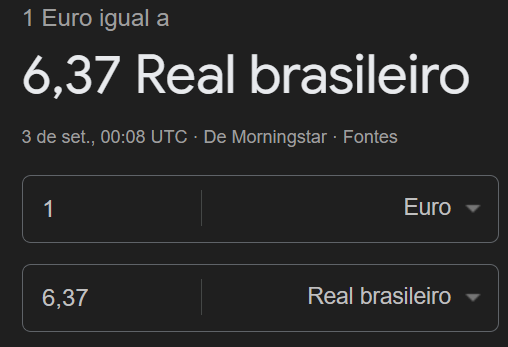

In [83]:
data['valor_emprestimo'].head()

0    1169
1    5951
2    2096
3    7882
4    4870
Name: valor_emprestimo, dtype: int64

In [84]:
dm_to_euro = 1 / 1.95583  # 1 Euro = 1,95583 DM
euro_to_brl = 6.37  # 1 Euro = 6,37 BRL
data['valor_emprestimo'] = data['valor_emprestimo'].apply(lambda x: x * dm_to_euro * euro_to_brl)
data.head()


,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,est_civil
0,0,0,6,0,0,3807.350332,0,1,4,0,4,2,67,0,1,2,1,1,1,1,1
1,1,1,48,1,0,19381.986164,0,1,2,0,2,2,22,0,1,1,1,1,0,1,0
2,0,0,12,0,0,6826.523778,0,1,2,0,3,2,49,0,1,1,0,2,0,1,1
3,0,0,42,1,0,25671.116610,0,1,2,1,4,1,45,0,1,1,1,2,0,1,1
4,1,0,24,0,1,15861.245609,0,1,3,0,4,0,53,0,1,2,1,2,0,1,1


# FAIXA DE VALORES

## Vamos separar os campos `prazo_emprestimo_meses` e `idade` em faixas de valores para facilitar a análise dos dados.

In [85]:
data['prazo_emprestimo_meses'].unique()

array([ 6, 48, 12, 42, 24, 36, 30, 15,  9, 10,  7, 60, 18, 45, 11, 27,  8,
       54, 20, 14, 33, 21, 16,  4, 47, 13, 22, 39, 28,  5, 26, 72, 40])

In [86]:
# transformar em anos 
data['prazo_emprestimo_anos'] = data['prazo_emprestimo_meses'].apply(lambda x: int(x/12))
data.drop('prazo_emprestimo_meses', axis=1, inplace=True)
data.head()

,default,conta_corrente,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,est_civil,prazo_emprestimo_anos
0,0,0,0,0,3807.350332,0,1,4,0,4,2,67,0,1,2,1,1,1,1,1,0
1,1,1,1,0,19381.986164,0,1,2,0,2,2,22,0,1,1,1,1,0,1,0,4
2,0,0,0,0,6826.523778,0,1,2,0,3,2,49,0,1,1,0,2,0,1,1,1
3,0,0,1,0,25671.116610,0,1,2,1,4,1,45,0,1,1,1,2,0,1,1,3
4,1,0,0,1,15861.245609,0,1,3,0,4,0,53,0,1,2,1,2,0,1,1,2


In [87]:
data['idade'].unique()

array([67, 22, 49, 45, 53, 35, 61, 28, 25, 24, 60, 32, 44, 31, 48, 26, 36,
       39, 42, 34, 63, 27, 30, 57, 33, 37, 58, 23, 29, 52, 50, 46, 51, 41,
       40, 66, 47, 56, 54, 20, 21, 38, 70, 65, 74, 68, 43, 55, 64, 75, 19,
       62, 59])

In [88]:
bins = list(range(0, 101, 10))

data['faixa_idade'] = pd.cut(data['idade'], bins=bins, right=False, labels=False)
data.drop(columns=['idade'], inplace=True, axis=1)
data.head()

,default,conta_corrente,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,outros_fiadores,anos_residencia_atual,propriedade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,est_civil,prazo_emprestimo_anos,faixa_idade
0,0,0,0,0,3807.350332,0,1,4,0,4,2,0,1,2,1,1,1,1,1,0,6
1,1,1,1,0,19381.986164,0,1,2,0,2,2,0,1,1,1,1,0,1,0,4,2
2,0,0,0,0,6826.523778,0,1,2,0,3,2,0,1,1,0,2,0,1,1,1,4
3,0,0,1,0,25671.116610,0,1,2,1,4,1,0,1,1,1,2,0,1,1,3,4
4,1,0,0,1,15861.245609,0,1,3,0,4,0,0,1,2,1,2,0,1,1,2,5


# AQUI VAMOS FAZER UMA PRIMEIRA ANALISE DE ML PARA CONSEGUIRMOS UMA COMPARAÇÃO AO FINAL COM O MELHOR MODELO

In [89]:
from sklearn.model_selection import train_test_split
Y = data['default']
X = data.drop('default', axis=1)

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.25)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
model = LogisticRegression()
model.fit(x_train,y_train)
predictions = model.predict(x_test)

report_sem_tratamento = classification_report(y_test,predictions)
print(report_sem_tratamento)

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       187
           1       0.47      0.33      0.39        63

    accuracy                           0.74       250
   macro avg       0.63      0.60      0.61       250
weighted avg       0.71      0.74      0.72       250



c:\Users\DELL\AppData\Local\pypoetry\Cache\virtualenvs\fiap-tech-challenge-3-CTmMtJrQ-py3.11\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# DIMENSIONALIDADE

In [90]:
data.shape

(1000, 21)

## Redução de Dimensionalidade

Nosso conjunto possui 20 features e 1 target, o que pode tornar o modelo mais complexo e sujeito a overfitting.  
Para simplificar e manter apenas as informações mais relevantes, vamos aplicar uma técnica de **redução de dimensionalidade**.  

C:\Users\DELL\AppData\Local\Temp\ipykernel_16748\3600437225.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='correlation_with_target', y='feature', data=corr_df, palette='coolwarm')


                        feature  correlation_with_target
18        prazo_emprestimo_anos                 0.214737
1             historico_credito                 0.163113
3              valor_emprestimo                 0.154739
9                   propriedade                -0.152940
5           tempo_emprego_atual                -0.117518
10  outros_planos_financiamento                 0.113285
4                    reserva_cc                -0.113231
11              tipo_residencia                -0.092785
0                conta_corrente                 0.089895
19                  faixa_idade                -0.084167
16      trabalhador_estrangeiro                 0.082079
17                    est_civil                -0.080677
6             taxa_comp_salario                 0.072404
2          proposito_emprestimo                 0.047622
12             n_creditos_banco                -0.045732
13               status_emprego                 0.036866
15                     telefone

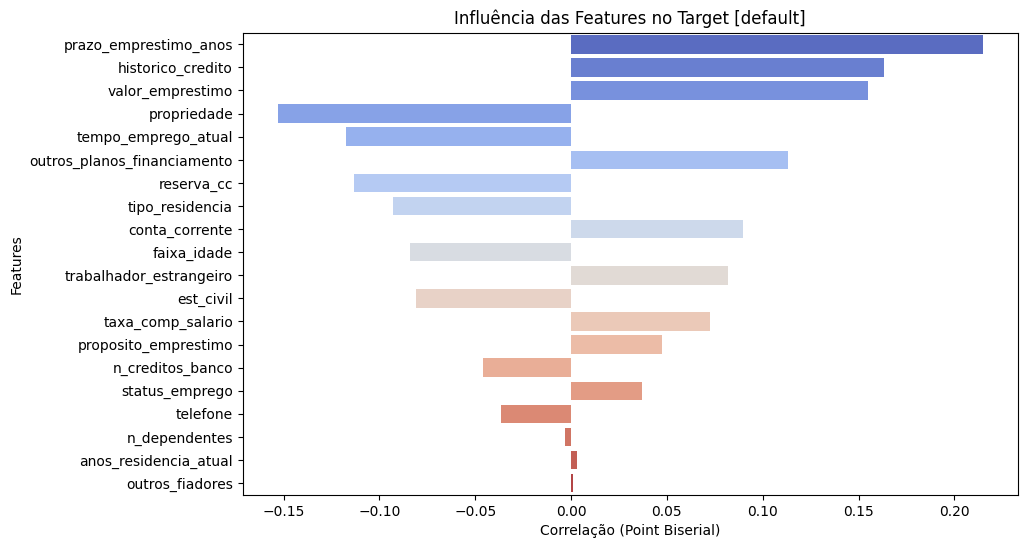

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pointbiserialr

# Supondo que 'data' seja seu DataFrame e 'default' seja o target binário
features = data.drop(columns=['default']).columns
correlations = []

for col in features:
    corr, _ = pointbiserialr(data['default'], data[col])
    correlations.append(corr)

# Criar DataFrame com correlações
corr_df = pd.DataFrame({'feature': features, 'correlation_with_target': correlations})
corr_df = corr_df.sort_values(by='correlation_with_target', key=abs, ascending=False)  # ordena pelo valor absoluto

# Mostrar tabela
print(corr_df)

# Gráfico de barras
plt.figure(figsize=(10,6))
sns.barplot(x='correlation_with_target', y='feature', data=corr_df, palette='coolwarm')
plt.title('Influência das Features no Target [default]')
plt.xlabel('Correlação (Point Biserial)')
plt.ylabel('Features')
plt.show()


## Seleção das Features mais importantes

Como podemos ver, algumas variáveis têm pouca influência sobre o nosso target `default`.  
Para simplificar o modelo e melhorar a performance, vamos **remover essas colunas**, mantendo apenas as **10 features mais importantes**.  

Além de reduzir complexidade, isso também facilita para o usuário **inserir dados de entrada**, já que precisará fornecer menos informações.


In [92]:
# Selecionar as top 10 features mais influentes
top_n = 10
top_features = corr_df['feature'].iloc[:top_n].tolist()

# Ordenar alfabeticamente
top_features_sorted = sorted(top_features)

# Criar um novo DataFrame apenas com as top features + target
data_top = data[top_features_sorted + ['default']]

# Mostrar as primeiras linhas do novo DataFrame
print("Top 10 features mais influentes com o target (ordenadas alfabeticamente):")
print(data_top.head())


Top 10 features mais influentes com o target (ordenadas alfabeticamente):
   conta_corrente  faixa_idade  historico_credito  outros_planos_financiamento  prazo_emprestimo_anos  propriedade  reserva_cc  tempo_emprego_atual  tipo_residencia  valor_emprestimo  default
0               0            6                  0                            0                      0            2           0                    1                1       3807.350332        0
1               1            2                  1                            0                      4            2           0                    1                1      19381.986164        1
2               0            4                  0                            0                      1            2           0                    1                1       6826.523778        0
3               0            4                  1                            0                      3            1           0                    1           

# DADOS DESBALANCEADOS

In [93]:
data_top['default'].value_counts()

default
0    700
1    300
Name: count, dtype: int64

70% dos dados são de emprestimos negados, vamos aplicar a tecnica de upsampling para balancear os dados.

In [94]:
from imblearn.over_sampling import SMOTE

# Separar features e target
X = data_top.drop(columns=['default'])
y = data_top['default']

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Criar DataFrame balanceado
data_resampled = pd.DataFrame(X_res, columns=X.columns)
data_resampled['default'] = y_res

# Mostrar quantidade de cada classe
print(data_resampled['default'].value_counts())


default
0    700
1    700
Name: count, dtype: int64


In [95]:
data_resampled.head()

,conta_corrente,faixa_idade,historico_credito,outros_planos_financiamento,prazo_emprestimo_anos,propriedade,reserva_cc,tempo_emprego_atual,tipo_residencia,valor_emprestimo,default
0,0,6,0,0,0,2,0,1,1,3807.350332,0
1,1,2,1,0,4,2,0,1,1,19381.986164,1
2,0,4,0,0,1,2,0,1,1,6826.523778,0
3,0,4,1,0,3,1,0,1,1,25671.116610,0
4,0,5,0,0,2,0,0,1,1,15861.245609,1


# Normalização para treinar o modelo

In [96]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import pickle
import os

# Criar pipeline de pré-processamento (sem modelo ainda)
preprocessor = Pipeline([
    ('scaler', StandardScaler()),   # normaliza os dados
])

# Separar features e target
X = data_resampled.drop(columns=['default'])
y = data_resampled['default']

# Ajustar pré-processador aos dados
X_transformed = preprocessor.fit_transform(X)
print(X_transformed.shape)

# Salvar o pré-processador

# Criar pasta 'model' se não existir
os.makedirs('model', exist_ok=True)

# Salvar o pré-processador
with open('model/preprocessor.pkl', 'wb') as f:
    pickle.dump(preprocessor, f)

print("Pré-processador salvo em 'model/preprocessor.pkl'")


(1400, 10)
Pré-processador salvo em 'model/preprocessor.pkl'


# SEPARAR EM TREINO E TESTE

In [97]:
x_train, x_test, y_train, y_test = train_test_split(X_transformed,y,test_size=0.1)

# TREINO E TESE DE MODELO

In [98]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, f1_score, accuracy_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [99]:
def evaluate_model(model, x_train, y_train, x_test, y_test, cv_splits=5):
    cv = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=42)
    cv_scores = cross_val_score(model, x_train, y_train, cv=cv, scoring="accuracy")
    
    model.fit(x_train, y_train)
    pred = model.predict(x_test)

    acc_test = accuracy_score(y_test, pred)
    f1_test = f1_score(y_test, pred, average="weighted")

    return {
        "Modelo": type(model).__name__,
        "CV_Mean": cv_scores.mean(),
        "CV_Std": cv_scores.std(),
        "Accuracy_Test": acc_test,
        "F1_Test": f1_test
    }

# MODELOS

In [100]:
random_state = 1375

modelos = [
    LogisticRegression(max_iter=1000, solver="lbfgs", random_state=random_state),
    RandomForestClassifier(n_estimators=21, max_depth=10, random_state=random_state),
    GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=random_state),
    SVC(kernel="rbf", C=1, gamma="scale", probability=True, random_state=random_state),
    KNeighborsClassifier(n_neighbors=7),
    DecisionTreeClassifier(max_depth=6, random_state=random_state),
    GaussianNB()
]

# Avaliar todos e guardar resultados
resultados = []
for m in modelos:
    resultados.append(evaluate_model(m, x_train, y_train, x_test, y_test))

# DataFrame comparativo
df_resultados = pd.DataFrame(resultados)
df_resultados

,Modelo,CV_Mean,CV_Std,Accuracy_Test,F1_Test
0,LogisticRegression,0.695238,0.035705,0.671429,0.671429
1,RandomForestClassifier,0.728571,0.030388,0.757143,0.757540
2,GradientBoostingClassifier,0.725397,0.044783,0.750000,0.750448
3,SVC,0.699206,0.037005,0.735714,0.735864
4,KNeighborsClassifier,0.678571,0.023677,0.764286,0.764707
5,DecisionTreeClassifier,0.689683,0.025397,0.692857,0.693282
6,GaussianNB,0.695238,0.035440,0.700000,0.697543


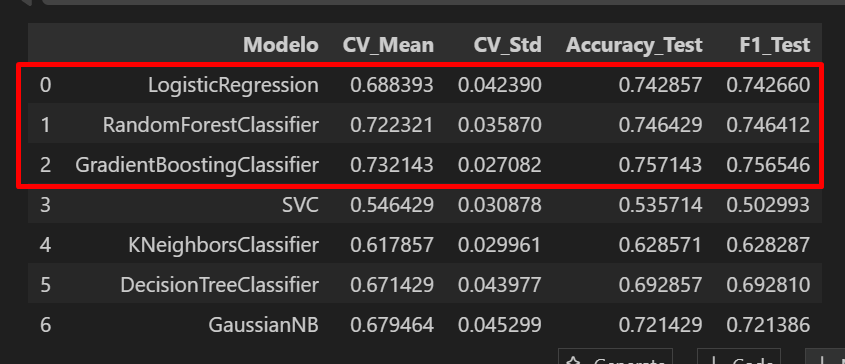

## Os modelos de LogisticRegression, RandomForestClassifier e GradientBoostingClassifier foram os melhores resultados para o problema.

Vamos aplicar um GridSearchCV para encontrar a melhor combinação de hiperparâmetros.

In [101]:
from sklearn.model_selection import GridSearchCV


def evaluate_grid_model(model, param_grid, x_train, y_train, x_test, y_test, cv_splits=5):
    """
    Faz gridsearch para o modelo, avalia com CV e retorna métricas.
    """
    print(f"Trining model: {model}")
    cv = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=42)

    grid = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring="accuracy",
        cv=cv,
        n_jobs=-1
    )
    grid.fit(x_train, y_train)

    best_model = grid.best_estimator_

    # Cross-validation scores já estão no grid
    cv_score = grid.best_score_

    # Avaliação no teste
    pred = best_model.predict(x_test)
    acc_test = accuracy_score(y_test, pred)
    f1_test = f1_score(y_test, pred, average="weighted")

    return {
        "Modelo": type(model).__name__,
        "Melhores Parâmetros": grid.best_params_,
        "CV_Mean": cv_score,
        "Accuracy_Test": acc_test,
        "F1_Test": f1_test
    }


In [102]:
# Hiperparâmetros a testar
param_grids = {
    "LogisticRegression": {
        "C": [0.001, 0.01, 0.1, 1],    # mais valores de regularização
        "solver": ["lbfgs", "liblinear", "saga"],  # saga lida bem com dados grandes
        "max_iter": [200, 500, 1000]
    },
    "RandomForestClassifier": {
        "n_estimators": [101, 301, 501],  
        "max_depth": [5, 10, 20],
        "bootstrap": [True, False]
    },
    "GradientBoostingClassifier": {
        "n_estimators": [101, 301, 501],   
        "learning_rate": [0.001, 0.01, 0.1],
        "max_depth": [5, 10, 20],
    }
}

# Modelos a otimizar
random_state = 1375

modelos = [
    LogisticRegression(random_state=random_state),
    RandomForestClassifier(random_state=random_state),
    GradientBoostingClassifier(random_state=random_state)
]

# Rodar avaliação com gridsearch
resultados = []
for m in modelos:
    resultados.append(
        evaluate_grid_model(m, param_grids[type(m).__name__], x_train, y_train, x_test, y_test)
    )

# Comparativo em tabela
df_resultados = pd.DataFrame(resultados)


Trining model: LogisticRegression(random_state=1375)
Trining model: RandomForestClassifier(random_state=1375)
Trining model: GradientBoostingClassifier(random_state=1375)


In [103]:
df_resultados

,Modelo,Melhores Parâmetros,CV_Mean,Accuracy_Test,F1_Test
0,LogisticRegression,"{'C': 0.001, 'max_iter': 200, 'solver': 'lbfgs'}",0.705556,0.664286,0.664063
1,RandomForestClassifier,"{'bootstrap': True, 'max_depth': 10, 'n_estimators': 301}",0.743651,0.757143,0.757541
2,GradientBoostingClassifier,"{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 501}",0.759524,0.785714,0.786065


In [104]:
best_model = GradientBoostingClassifier(learning_rate=0.1, max_depth=10, n_estimators=100)
best_model.fit(x_train, y_train)
pred = best_model.predict(x_test)
report_com_tratamento = classification_report(y_test,pred)
print(report_com_tratamento)

              precision    recall  f1-score   support

           0       0.80      0.75      0.78        76
           1       0.72      0.78      0.75        64

    accuracy                           0.76       140
   macro avg       0.76      0.77      0.76       140
weighted avg       0.77      0.76      0.76       140



# COMPARAÇÃO

In [105]:
print("SEM TRATAMENTO DE DADOS")
print(report_sem_tratamento)
print('-'*20)
print("COM TRATAMENTO DE DADOS")
print(report_com_tratamento)

SEM TRATAMENTO DE DADOS
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       187
           1       0.47      0.33      0.39        63

    accuracy                           0.74       250
   macro avg       0.63      0.60      0.61       250
weighted avg       0.71      0.74      0.72       250

--------------------
COM TRATAMENTO DE DADOS
              precision    recall  f1-score   support

           0       0.80      0.75      0.78        76
           1       0.72      0.78      0.75        64

    accuracy                           0.76       140
   macro avg       0.76      0.77      0.76       140
weighted avg       0.77      0.76      0.76       140



## Observamos que conseguimos uma melhor generalização do modelo e evitamos o overfitting

### Vamos salvar o modelo para usar em produção

In [106]:
pickle.dump(best_model, open('model/model.pkl','wb'))
